<a href="https://colab.research.google.com/github/rajachowdary99/Predicting_Salary_based_on_the_Years_of_Experience_using_Simple_Linear_regression/blob/main/Predicting_Salary_based_on_the_Years_of_Experience_using_Simple_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Salary_Data.csv')

In [2]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

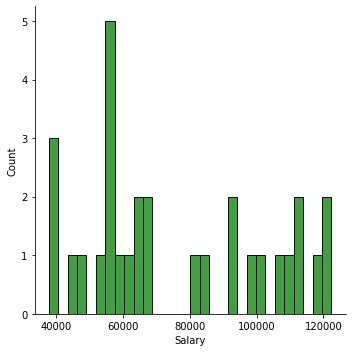

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['Salary'],color='green',bins=30)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [9]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [10]:
#checking for nan values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [11]:
#splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
print(x_train)

[[ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [13]:
print(x_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [14]:
#training the model usig simple linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_estimate=lr.predict(x_test)

In [17]:
print(y_estimate)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


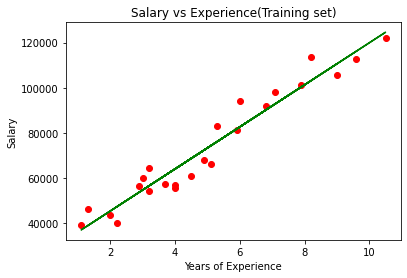

In [18]:
#Visualizing the Training set results
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='green')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

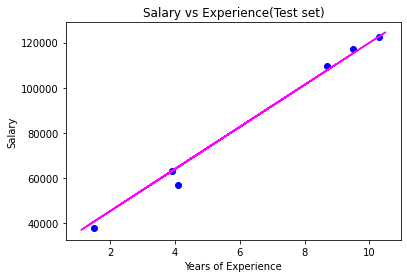

In [19]:
#Visualizing the Test set results
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_train,lr.predict(x_train),color='magenta')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [22]:
#Checking the performance of the model
#r2_score
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test,y_estimate))

0.9897037514693541


In [23]:
#slope and intercept values of the model
print(lr.coef_)
print(lr.intercept_)

[9312.57512673]
26780.09915062818
